## 1.2 Problem 1 - Getting Started with Julia/JuMP

#### Model the problem in JuMP: Solve this problem using the HiGHS, ECOS, and SCS solvers.

In [16]:
using JuMP, HiGHS, ECOS, SCS
m = Model()

@variable(m, x1 >= 0)
@variable(m, x2 >= 0)

@objective(m, Max, 4x1 + 5x2)

@constraint(m, con1, 2x1 + 3x2 <= 12)
@constraint(m, con2, x1 + 4x2 <= 10)
@constraint(m, con3, 3x1 + x2 <= 9);

In [17]:
println("Time to solve this model using HiGHS: ")
set_optimizer(m, HiGHS.Optimizer)
@time(optimize!(m))

println("x1: ", value(x1))
println("x2: ", value(x2))
println("objective_value: ", objective_value(m))

Time to solve this model using HiGHS: 
Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 4e+00]
  Cost   [4e+00, 5e+00]
  Bound  [0e+00, 0e+00]
  RHS    [9e+00, 1e+01]
Presolving model
3 rows, 2 cols, 6 nonzeros  0s
3 rows, 2 cols, 6 nonzeros  0s
Presolve : Reductions: rows 3(-0); columns 2(-0); elements 6(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -8.9999895867e+00 Ph1: 3(14); Du: 2(8.99999) 0s
          3     1.9000000000e+01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 3
Objective value     :  1.9000000000e+01
HiGHS run time      :          0.00
  0.134086 seconds (112.72 k allocations: 7.558 MiB, 99.57% compilation time: 100% of which was recompilation)
x1: 2.3636363636363633
x2: 1.90909090909091
objective_value: 19.000000000000004


In [18]:
println("Time to solve this model using ECOS: ")
set_optimizer(m, ECOS.Optimizer)
@time(optimize!(m))

println("x1: ", value(x1))
println("x2: ", value(x2))
println("objective_value: ", objective_value(m))

Time to solve this model using ECOS: 
  0.304269 seconds (234.28 k allocations: 15.745 MiB, 4.88% gc time, 98.97% compilation time: 79% of which was recompilation)
x1: 2.363636361776668
x2: 1.9090909087074541
objective_value: 18.99999999064394

ECOS 2.0.8 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.643e+001  -4.418e+001  +1e+001  1e-003  4e-001  1e+000  3e+000    ---    ---    1  1  - |  -  - 
 1  -1.874e+001  -2.111e+001  +1e+000  8e-005  4e-002  6e-002  2e-001  0.9125  1e-002   0  0  0 |  0  0
 2  -1.899e+001  -1.903e+001  +2e-002  1e-006  6e-004  2e-003  4e-003  0.9859  3e-003   0  0  0 |  0  0
 3  -1.900e+001  -1.900e+001  +3e-004  2e-008  7e-006  2e-005  5e-005  0.9890  1e-004   1  0  0 |  0  0
 4  -1.900e+001  -1.900e+001  +3e-006  2e-010  8e-008  2e-007  5e-007  0.9890  1e-004   1  0  0 |  0  0
 5  -1.900e+001  -1.900e+001  +3e-008  2e-012  9e-0

In [19]:
println("Time to solve this model using SCS: ")
set_optimizer(m, SCS.Optimizer)
@time(optimize!(m))

println("x1: ", value(x1))
println("x2: ", value(x2))
println("objective_value: ", objective_value(m))

Time to solve this model using SCS: 
------------------------------------------------------------------
	       SCS v3.2.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 2, constraints m: 5
cones: 	  l: linear vars: 5
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
	  compiled with openmp parallelization enabled
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 8, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|3.85e+001 1.22e+000 6.56e+001 -5.74e+001 1.00e-001 4.92e-004 
    75|3.40e-005 1.79e-005 3.67e-005 -1.90e+001 1.00e-001

#### Which solver is most accurate (gets closest to the “right” answer)?
SCS is the most accurate solver as it yields an objective value more precise:
* HiGHS: 19.000000000000004
* ECOS: 18.99999999064394
* SCS: 19.000020161125935

#### Which is fastest (use the @time macro)?  Can you speculate as t why?
HiGHS is the fastest solver, which may be due to its lower memory usage:
* HiGHS: 0.000578 seconds (186 allocations: 12.250 KiB)
* ECOS: 0.003123 seconds (1.92k allocations: 126.000 KiB)
* SCS: 0.004113 seconds (2.11k allocations: 137.664 KiB)

#### If there is no clear difference between the solvers, can you think of some factors that might contribute to solver speed differences?
Differences in solver speeds can be attributed to the specific algorithms they use and their respective memory efficiencies.

## 1.3 Problem 2 - Airport Expansion
#### (a) Formulate a linear program (i.e., write a mathematical model using appropriate notation) to help the government plan the airport expansion to maximize profit. State the math model then code and solve the model using Julia. 

1. runway by 1 acre: x1
- 100 hours of labor
- 500 pounds of raw material
- accomodate 5 new flights per day

2. terminal by an extra 10 square feet: x2
- 250 hours of labor
- 300 pounds of raw material
- accomodate up to 100 new passengers per day


3. profit
- Each flight = profit of \$1000
- each passenger = profit of \$50


4. constraint
- at least 15 new flights can be added per day
- 1000 hours of labor available
- 3000 pounds of raw material available

-------------------------------------
objective: max x1 * 5 * 1000 + x2 * 100 * 50

constraint: 

s.t. 
- 5 * x1 >= 15
- 100 * x1 + 250 * x2 <= 1000
- 500 * x1 + 300 * x2 <= 3000
- x2 >= 0

(x1 - 3 = u, u >= 0)

--> max 5000 * (u+3) + 5000 * x2

s.t. 
- 2 * (u+3) + 5 * x2 <= 20
- 5 * (u+3) + 3 * x2 <= 30
- u, x2 >= 0

**math model:**

--> max 5000 * u + 5000 * x2 + 15000

s.t. 
- 2 * u + 5 * x2 <= 14
- 5 * u + 3 * x2 <= 15
- u, x2 >= 0

In [20]:
using Clp
m = Model()
@variable(m, u >= 0)
@variable(m, x2 >= 0)

@objective(m, Max, 5000 * u + 5000 * x2 + 15000)

@constraint(m, lab_con, 2 * u + 5 * x2 <= 14)
@constraint(m, mat_con, 5 * u + 3 * x2 <= 15)

set_optimizer(m, Clp.Optimizer)

set_optimizer(m, Clp.Optimizer)
@time(optimize!(m))

println("expand ", value(u) + 3, " acres of runway environment")
println("expand ", value(x2) * 10, " square feet of airport terminal area")
println("Total profit will be \$", objective_value(m))

  0.000437 seconds (290 allocations: 20.812 KiB)
expand 4.7368421052631575 acres of runway environment
expand 21.05263157894737 square feet of airport terminal area
Total profit will be $34210.52631578947
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 15000 Dual inf 10000 (2)
Clp0006I 2  Obj 34210.526
Clp0000I Optimal - objective value 34210.526
Clp0032I Optimal objective 34210.52632 - 2 iterations time 0.002


Using the Clp Solver, when expanding around 4.74 acres of runway and approximately 21.05 square feet of airport terminal area, the government can maximize its profit to around $34,210.53.

#### (b) Code the same model once again, this time separating the parameters from the solution as we did in class (see Top Brass examples). Confirm that you obtain the same solution as in part (a).

In [21]:
land_types = [:runway, :terminal]

lab_req = Dict(:runway => 2, :terminal => 5)
mat_req = Dict(:runway => 5, :terminal => 3)

profit = Dict(:runway => 5000, :terminal => 5000)
# + 15000 in the end

lab_avail = 14
mat_avail = 15;

In [22]:
using Clp
m = Model(Clp.Optimizer)

@variable(m, land[land_types] >= 0)

@objective(m, Max, sum(profit[i] * land[i] for i in land_types))

@constraint(m, sum(lab_req[i] * land[i] for i in land_types) <= lab_avail)
@constraint(m, sum(mat_req[i] * land[i] for i in land_types) <= mat_avail)

optimize!(m)

# println(value.(land)) 
println("expand ", value(land[:runway]) + 3, " acres of runway environment")
println("expand ", value(land[:terminal]) * 10, " square feet of airport terminal area")
println("Total profit will be \$", objective_value(m)+ 15000)

expand 4.7368421052631575 acres of runway environment
expand 21.05263157894737 square feet of airport terminal area
Total profit will be $34210.52631578947
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 0 Dual inf 10000 (2)
Clp0006I 2  Obj 19210.526
Clp0000I Optimal - objective value 19210.526
Clp0032I Optimal objective 19210.52632 - 2 iterations time 0.002


---> **I obtain the same solution as in part (a).**

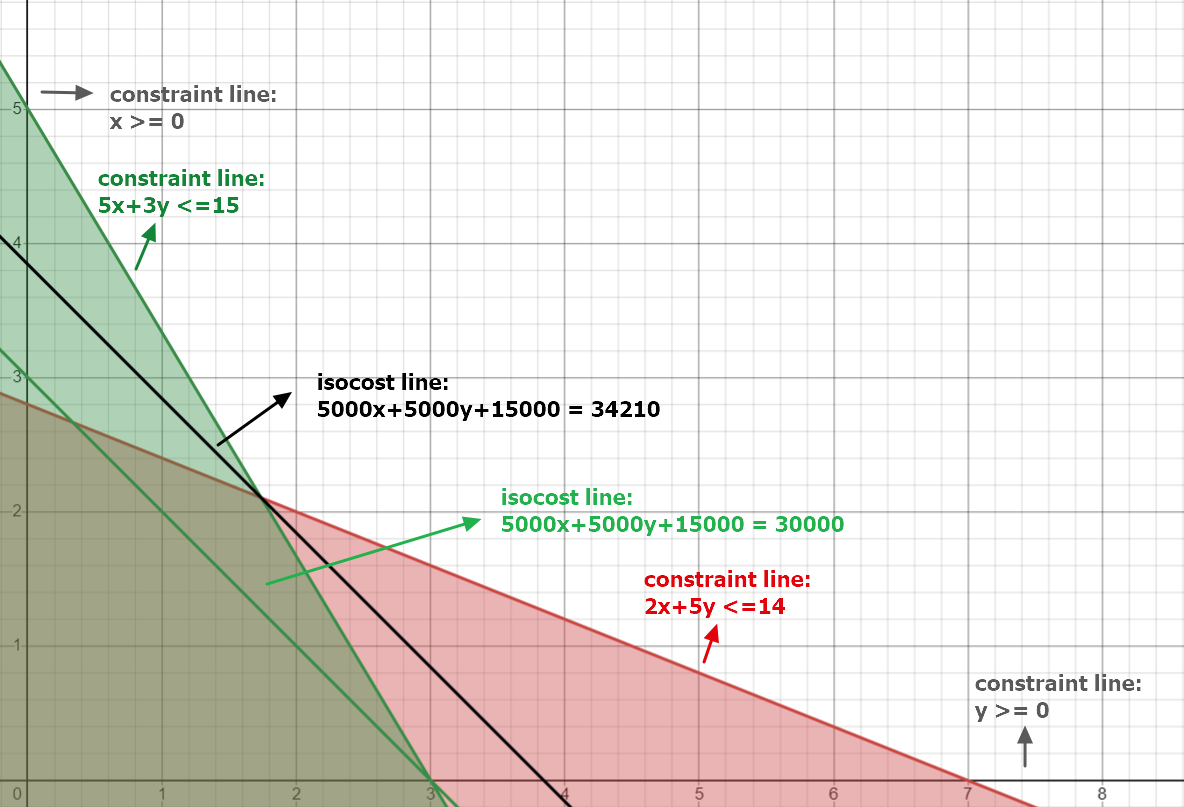

In [23]:
display("image/png", read("2c.png"))

## 1.4 Problem 3 - Craft Beer

In [24]:
using DataFrames, CSV, NamedArrays

#Load the data file
df = CSV.read("brewery_data.csv",DataFrame,delim=',');

# create a list of beers
beers = convert(Array,df[1:end,1])

# create a list of locations
locs = 1:5
# for i in locs
#     print(i)
# end

# create a dictionary of the total time it takes to brew each type of beer
time_to_brew = Dict(zip(beers,df[1:end,2]))

# create a dictionary of the minimum kegs required for each beer
min_req = Dict(zip(beers,df[1:end,3]))

brew_cost_matrix = Matrix(df[1:end,4:end])
# rows are beers, columns are locs
brew_cost_array = NamedArray(brew_cost_matrix, (beers, locs),("beers","locs"))

time_avail = 70000;

#### (a) Formulate a linear program (i.e., write a mathematical model using appropriate notation) to help the microbrewery minimize cost of meeting demand for each type of beer. Give a general form (parameters only -- no numbers) of the math model.

1. variable
- 25 different rotational beers: beers
- 5 different locations: locs 
2. constraint
- time_to_brew <= 70000 hours of tank fermentation time available at each of the locations
- beer >=min_req
3. objective
- min beers * cost
------
formulate:
- @variable(m, beer_loc[beers, locs] >= 0)
- @objective(m, Min, sum(beer_loc[b, l] * brew_cost_array[b, l]))
- @constraint(m, const_time[b], sum(time_to_brew[b] * beer_loc[b, l]) <= time_avail)
- @constraint(m, const_min_req[b], sum(beer_loc[b, l]) >= min_req[b in beers])

-----
**math model**

min (each beer of each loc) * (cost of each beer and each loc)

s.t.

- sum(each beer of each loc) >= (each min_require)
- sum(each beer of each loc)r * timc) <=(time_avail of each loc))


#### (b) Implement and solve this instance of the model in Julia/JuMP.  Display the optimal objective value and the optimal solution (variable values).

In [25]:
using JuMP, Clp
m = Model(Clp.Optimizer)

# @variable(m, loc1[(beers, locs)] >= 0)
@variable(m, beer_loc[beers, locs] >= 0)
# print(loc1)
@expression(m, total_cost[b in beers], sum(beer_loc[b, l] * brew_cost_array[b, l] for l in locs))
@objective(m, Min, sum(total_cost[b] for b in beers))
@constraint(m, const_time1, sum(time_to_brew[b] * beer_loc[b, 1] for b in beers) <= time_avail)
@constraint(m, const_time2, sum(time_to_brew[b] * beer_loc[b, 2] for b in beers) <= time_avail)
@constraint(m, const_time3, sum(time_to_brew[b] * beer_loc[b, 3] for b in beers) <= time_avail)
@constraint(m, const_time4, sum(time_to_brew[b] * beer_loc[b, 4] for b in beers) <= time_avail)
@constraint(m, const_time5, sum(time_to_brew[b] * beer_loc[b, 5] for b in beers) <= time_avail)
@constraint(m, const_min_req[b in beers], sum(beer_loc[b, l] for l in locs) >= min_req[b])

optimize!(m)

println("Minimun cost of the brewery: \$", objective_value(m), " (optimal objective value).")
println("How much of each type of beer should be brewed at each location? (optimal solution (variable values))")
for i in beer_loc
    if value(value(i)) > 10e-5
        println(i, ": ", value(i))
    end
end

Minimun cost of the brewery: $114881.20555555554 (optimal objective value).
How much of each type of beer should be brewed at each location? (optimal solution (variable values))
beer_loc[8,1]: 541.0
beer_loc[10,1]: 511.0
beer_loc[11,1]: 530.0
beer_loc[14,1]: 125.38888888888891
beer_loc[15,1]: 557.0
beer_loc[19,1]: 570.0
beer_loc[20,1]: 572.0
beer_loc[1,2]: 575.0
beer_loc[16,2]: 512.0
beer_loc[17,2]: 134.1500000000001
beer_loc[18,2]: 724.0
beer_loc[23,2]: 703.0
beer_loc[24,2]: 670.0
beer_loc[2,3]: 605.0
beer_loc[5,3]: 583.0
beer_loc[9,3]: 722.0
beer_loc[21,3]: 706.0
beer_loc[4,4]: 683.0
beer_loc[6,4]: 175.66666666666617
beer_loc[7,4]: 540.0
beer_loc[12,4]: 722.0
beer_loc[22,4]: 532.0
beer_loc[3,5]: 542.0
beer_loc[6,5]: 356.3333333333338
beer_loc[13,5]: 706.0
beer_loc[14,5]: 479.6111111111111
beer_loc[17,5]: 561.8499999999999
beer_loc[25,5]: 598.0
Coin0506I Presolve 30 (0) rows, 125 (0) columns and 250 (0) elements
Clp0006I 0  Obj 0 Primal inf 15237 (25)
Clp0006I 29  Obj 114881.21
Clp000

## 1.5 Problem 4 - Standard Form


\begin{align*}
\min 3x_1 + 2x_2 + x_3 + 4x_4\\
   \mbox{s.t. }  x_1 + x_2- x_3 + x_4 &\geq 5\\
  2x_1 - 4x_2 + 3x_3 + x_4&= 10\\
 -x_1 + 2x_2+ \phantom{x_3} +x_4 &\leq 8\\
 x_2 + x_4 \geq -3\\
  x_1, x_3\geq 0\\
  x_2, x_4 & \mbox{ Unrestricted in Sign (Free)}\\
\end{align*}  

#### (a) Convert the problem to standard form.
1. 
* x_2 = e-f, e,f >= 0
* x_4 = g-h, g,h >= 0
* turn min into max

--->

-max -3x_1 - 2e + 2f - x_3 - 4g + 4h

s.t. 
- x_1 + e - f - x_3 + g - h >= 5
- 2x_1 - 4e + 4f + 3x_3 + g - h = 10
- -x_1 + 2e + 2f + g - h <= 8
- e - f + g - h >= -3
- x_1, x_3, e, f, g, h >=0

2. 
*  replace equality with two inequalitie
* flip >=

--->

**standard form**
<p style="text-align: left;">
$\begin{align}
\underset{x_1,e,f,x_3,g,h}{-\max}\ & -3x_1 - 2e + 2f - x_3 - 4g + 4h & \\
\text{s.t.} \ & -x_1 - e + f + x_3 - g + h \leq -5 &\\
& 2x_1 - 4e + 4f + 3x_3 + g - h \leq 10 &\\
& -2x_1 + 4e - 4f - 3x_3 - g + h \leq -10 &\\
& -x_1 + 2e + 2f + g - h \leq 8 &\\
& -e + f - g + h \leq 3 & \\
& x_1, x_3, e, f, g, h \geq 0&
\end{align}$
</p>

#### (b) What are $A$, $b$, $c$,and $x$ in this problem?  Clearly indicate how the decision variables of your transformed LP relate to those of the original LP. 

- c = [-3 -2 2 -1 -4 4]
- A =
  
  [[-1 -1  1  1 -1  1]
  
   [ 2 -4  4  3  1 -1]
  
   [-2  4 -4 -3 -1  1]
  
   [-1  2  2  0  1 -1]
  
   [0 -1  1  0 -1  1]]

- b = [-5 10 -10 8 3]
- x = [x_1 e f x_3 g h]
    - x_2 = e-f
    - x_4 = g-h

#### (c) Solve the standard-form LP in Julia and report the objective value and the value of each decision variable in an optimal solution to the original LP.

In [26]:
using JuMP, Clp

m = Model(Clp.Optimizer)

@variable(m, x_1 >= 0)
@variable(m, e >= 0)
@variable(m, f >= 0)
@variable(m, x_3 >= 0)
@variable(m, g >= 0)
@variable(m, h >= 0)

@constraint(m, -x_1 - e + f + x_3 - g + h <= -5)
@constraint(m, 2x_1 - 4e + 4f + 3x_3 + g - h <= 10)
@constraint(m, -2x_1 + 4e - 4f - 3x_3 - g + h <= -10)
@constraint(m, -x_1 + 2e + 2f + g - h <= 8)
@constraint(m, -e + f - g + h <= 3)

@objective(m, Max, -3x_1 - 2e + 2f - x_3 - 4g + 4h)
# then *(-1)
# x_2 = e-f
# x_4 = g-h

optimize!(m)
# println(m)
println("x1 = ", value(x_1))
println("x2 = ", value(e-f))
println("x3 = ", value(x_3))
println("x4 = ", value(g-h))
println("objective value = ", -objective_value(m))

x1 = 8.0
x2 = 0.6000000000000001
x3 = 0.0
x4 = -3.6000003814697266
objective value = 10.799995422363281
Coin0506I Presolve 5 (0) rows, 6 (0) columns and 27 (0) elements
Clp0006I 0  Obj 0 Primal inf 7.4999998 (2) Dual inf 5.9999998 (2)
Clp0006I 3  Obj -10.799995
Clp0000I Optimal - objective value -10.799995
Clp0032I Optimal objective -10.79999542 - 3 iterations time 0.002
